<a href="https://colab.research.google.com/github/BKitainge/Phase1_Project/blob/main/P1_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing all libraries required for the project 
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm
%matplotlib inline

##This imports all the libraries that we will use in this project

Now we load the bom movie dataset 

In [6]:
from google.colab import files
uploaded = files.upload()

Saving bom.movie_gross.csv.gz to bom.movie_gross.csv.gz


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [63]:
#opening the dataset
bom_movies = pd.read_csv("bom.movie_gross.csv.gz")

In [64]:
#viewing the first 10 rows of the dataset
bom_movies.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [65]:
#viewing the last 10 rows in the dataset
bom_movies.tail(10)

,title,studio,domestic_gross,foreign_gross,year
3377,Let Yourself Go,Men.,12200.0,NaN,2018
3378,Hannah (2018),PDF,11700.0,NaN,2018
3379,Souvenir,Strand,11400.0,NaN,2018
3380,Furious (Legend of Kolovrat),CARUSEL,10000.0,NaN,2018
3381,Beauty and the Dogs,Osci.,8900.0,NaN,2018
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [66]:
#geting info about the data
bom_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


From the infomation above we can see that the dataset contains 5 columns with data of different data types

Now we get a summary of the statistics of the data

In [67]:
#summary statistics
bom_movies.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


#Here we have summary statistics of the bom movie dataset
##There is the mean, standard deviation, percentiles, minimum and maximum values

In [70]:
#checking for unique values in the bom data
bom_movies.nunique()

title             3386
studio             257
domestic_gross    1797
foreign_gross     1204
year                 9
dtype: int64

In [73]:
#checking for null values
bom_movies.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

We have several null values that should be dropped.

In [74]:
#dropping null values
bom_movies = bom_movies.dropna()
bom_movies.shape
bom_movies

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


In [75]:
#checking for null values again
bom_movies.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

Great! We have no null values 

Now we connect to the imdb sql database

In [17]:
upload = files.upload()

Now we can generate a bargraph plot showing the total domestic gross per year

In [19]:
#connecting to the imdb database through sqlite3
conn = sqlite3.connect('im.db 2')
conn

In [20]:
#Load table into a pandas dataframe
imdf = pd.read_sql(''' SELECT*
                       FROM movie_basics;
                      ''',conn)
imdf.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


Getting the info about the dataset

In [21]:
imdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


Summary statistics of the data

In [22]:
imdf.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


#Now we check for the tables contained in the database

In [23]:
conn = sqlite3.connect('im.db 2')
pd.read_sql("""
SELECT name
FROM sqlite_master 
WHERE type = 'table';
""",conn)


,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


##We can see that we have 8 tables. Now we need to connect to the movie_basics table



In [28]:
#previewing the first five 10 rows of the movie basics table
imdb_movie_basics = pd.read_sql("""
                              SELECT*
                              FROM movie_basics;
                              """,conn)
imdb_movie_basics.head(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


##Connecting to movie_ratings table

In [29]:
#connecting to the sql database with imdb ratings and reading the first 10 rows
imdb_movie_ratings = pd.read_sql("""
                              SELECT*
                              FROM movie_ratings;
                              """,conn)
imdb_movie_ratings.head(10)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326
6,tt1094666,7.0,1613
7,tt1130982,6.4,571
8,tt1156528,7.2,265
9,tt1161457,4.2,148


#From this we can establish that the tables movie_basics and movie_ratings are connected by having the primary key movie_id which is a unique code for every movie to specificially identify it

#Let's connect to the movie budgets dataset 

In [33]:
uploaded = files.upload()

Saving tn.movie_budgets.csv.gz to tn.movie_budgets.csv.gz


In [36]:
#Displaying data details of the first 10 rows
movie_budgets= pd.read_csv("tn.movie_budgets.csv.gz")
movie_budgets.head(10)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [37]:
#last 10 rows of the dataset
movie_budgets.tail(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5772,73,"Jan 13, 2012",Newlyweds,"$9,000","$4,584","$4,584"
5773,74,"Feb 26, 1993",El Mariachi,"$7,000","$2,040,920","$2,041,928"
5774,75,"Oct 8, 2004",Primer,"$7,000","$424,760","$841,926"
5775,76,"May 26, 2006",Cavite,"$7,000","$70,071","$71,644"
5776,77,"Dec 31, 2004",The Mongol King,"$7,000",$900,$900
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


#Now let us get more information on the dataset

In [38]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


##The production_budget, domestic_gross and worldwide_gross are all strings datatypes that cannot be mathematically manipulated. Thus we have to convert them to integers.

# **DATA PREPARATION**

In [43]:
#First we remove the $ sign to avoid confusion
movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace("$",'')
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].str.replace("$",'')
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.replace("$",'')

movie_budgets.head(10)


<ipython-input-43-5a13eac558f5>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movie_budgets['production_budget']= movie_budgets['production_budget'].str.replace("$",'')
<ipython-input-43-5a13eac558f5>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movie_budgets['domestic_gross']= movie_budgets['domestic_gross'].str.replace("$",'')
<ipython-input-43-5a13eac558f5>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movie_budgets['worldwide_gross']= movie_budgets['worldwide_gross'].str.replace("$",'')


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425
8,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209
9,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923


In [50]:
#We now convert the stringsto integers
movie_budgets['production_budget'] = movie_budgets['production_budget'].astype(int)
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].astype(int)
movie_budgets['id'] = movie_budgets['id'].astype(str)
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].astype(np.int64)

In [45]:
#Let's check of the string values have been converted to integers
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   object
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 271.2+ KB


##Great we have succesfully converted the strings to integers

##Now we can create variables: total_gross, net-return and return on investments. 

In [48]:
#total_gross is determined by summing the domestic_gross and the worldwide_gross values
movie_budgets['total_gross'] = movie_budgets['domestic_gross'] + movie_budgets['worldwide_gross']
movie_budgets['total_gross'].head(10)

0    3536852904
1    1286727750
2     192524700
3    1862019831
4    1936903129
5    2989973445
6    2726949682
7    1272840850
8     884969504
9    1079695098
Name: total_gross, dtype: int64

In [49]:
#net_return is the difference between total_gross and production_budget
movie_budgets['net_return'] = movie_budgets['total_gross'] - movie_budgets['production_budget']
movie_budgets['net_return'].head(10)

0    3111852904
1     876127750
2    -157475300
3    1531419831
4    1619903129
5    2683973445
6    2426949682
7     972840850
8     584969504
9     779695098
Name: net_return, dtype: int64

In [51]:
#return_on_investment is the ratio of net_return to poduction_budget expressed as a percentage
movie_budgets['return_on_investment'] = movie_budgets['net_return'] / movie_budgets['production_budget'] * 100
movie_budgets['return_on_investment'].head(10)

0    732.200683
1    213.377435
2    -44.992943
3    463.224389
4    511.010451
5    877.115505
6    808.983227
7    324.280283
8    194.989835
9    259.898366
Name: return_on_investment, dtype: float64

#**DATA ANALYSIS AND VISUALIZATION**

##Now that our data is prepared and ready for use we can begin the creating analyses and visulaizations from the data

We begin by checking the movies we have against the specific genres. This indicates the number of movies produced by studios of the specific genres.

In [53]:
#Calculating the total number of movies per genrefrom the imdb dataset
movies_per_genre = imdb_movie_basics['genres'].value_counts().head(10)
movies_per_genre

Documentary              32185
Drama                    21486
Comedy                    9177
Horror                    4372
Comedy,Drama              3519
Thriller                  3046
Action                    2219
Biography,Documentary     2115
Drama,Romance             2079
Comedy,Drama,Romance      1558
Name: genres, dtype: int64

Now let us reprent this information on a horizontal bar graph

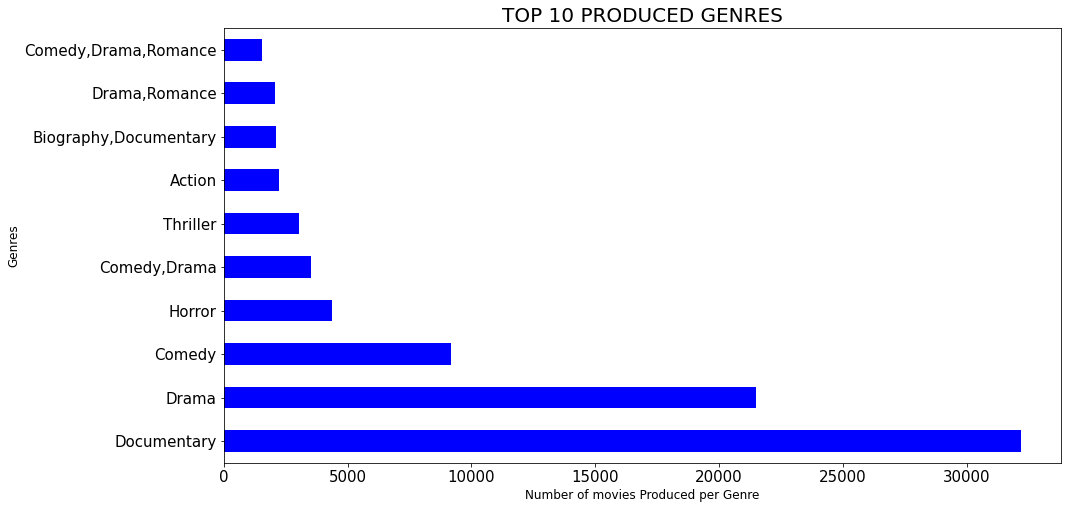

In [56]:
#Bar graph showing the top produced movie genres
ax = movies_per_genre.plot(kind = 'barh', figsize = (15,8), color = 'blue', fontsize = 15)
ax.set_alpha(0.5)
ax.set_title('TOP 10 PRODUCED GENRES', fontsize = 20)
ax.set_ylabel('Genres', fontsize = 12)
ax.set_xlabel('Number of movies Produced per Genre', fontsize = 12)
plt.show()

Based on the visual above we can see that Documentary movies were the most produced genre thus this will be our recommendation to the studio. Drama and Comedy movies took the first and second runners up positions respectively

Now let us focus on the competition. Let us establish how much competitor studios made in total gross. This information will be very useful in identifying the market position of competing studios.

In [76]:
bom_movies['foreign_gross'].head(10)

0    652000000
1    691300000
2    664300000
3    535700000
4    513900000
5    398000000
6    311500000
7    391000000
8    291600000
9    277300000
Name: foreign_gross, dtype: object

We have to convert the datatype from object to float to allow for mathematical calculations

In [77]:
#Converting the column foreign gross to float datatype
bom_movies['foreign_gross'] = bom_movies['foreign_gross'].str.replace(',','').astype(float)
bom_movies['foreign_gross']

0       652000000.0
1       691300000.0
2       664300000.0
3       535700000.0
4       513900000.0
           ...     
3275      1500000.0
3286       229000.0
3309       256000.0
3342         5200.0
3353        30000.0
Name: foreign_gross, Length: 2007, dtype: float64

We can see that the datatype is float thus is viable for mathematical calculations


Total gross is the sum of domestic goss and foreign gross

In [78]:
#Adding foreign gross and domestic gross to get total gross
bom_movies['total_gross'] = bom_movies['domestic_gross'] + bom_movies['foreign_gross']

In [79]:
bom_movies['total_gross'].head(10)

0    1.067000e+09
1    1.025500e+09
2    9.603000e+08
3    8.283000e+08
4    7.526000e+08
5    6.985000e+08
6    6.239000e+08
7    5.918000e+08
8    5.431000e+08
9    4.949000e+08
Name: total_gross, dtype: float64

We now have to arrange this data in descenfing order

In [81]:
#Arranging the data of total gross for every studio in descending order 
competition_gross =bom_movies.groupby('studio')['total_gross'].mean().sort_values(ascending = False).head()
competition_gross.head(10)

studio
HC          8.703000e+08
P/DW        5.076500e+08
BV          4.249075e+08
GrtIndia    2.542000e+08
WB          2.368577e+08
Name: total_gross, dtype: float64

Now we can create a bargraph that epresents this information

Text(0, 0.5, 'Total Gross')

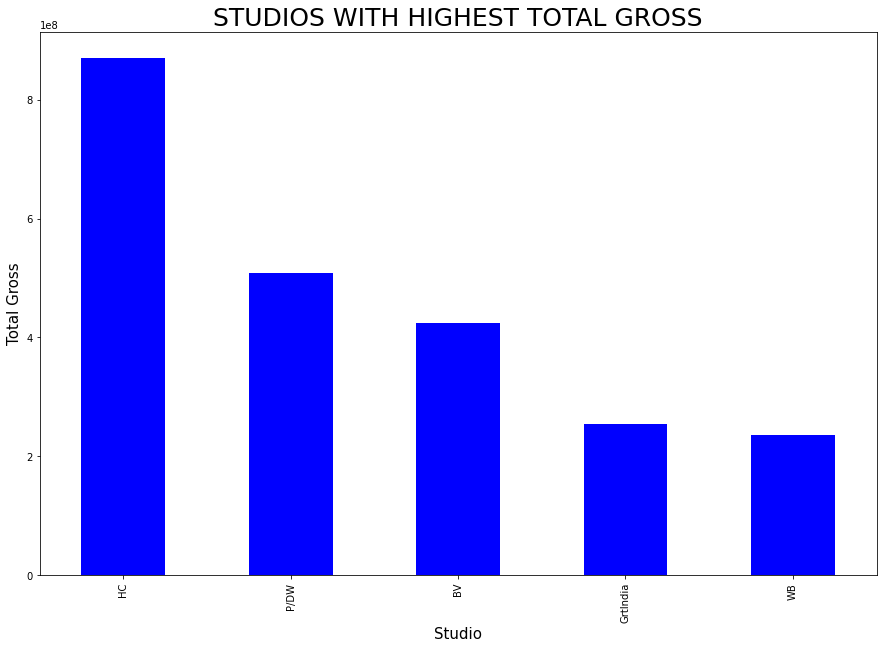

In [83]:
#Creating a bar graph of the studios with highest earnings
ax = competition_gross.plot(kind = 'bar',figsize = (15,10), color = 'blue', width = 0.5)
ax.set_title('STUDIOS WITH HIGHEST TOTAL GROSS', fontsize = 25)
ax.set_xlabel('Studio', fontsize = 15)
ax.set_ylabel('Total Gross', fontsize = 15)

From this we can tell that HC studios had the highest total ross with P/DW and BV following in second and third positions espectively.
This information will inform the client on how the competiotion is performing creating a baseling for them to asses the performance.


Now we can look at the movies in terms of ratings.

In [85]:
#lets get more information on the imdb movie_ratings table
imdb_movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [86]:
#more infomation on movie_basics table
im_movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


We now have to join the movie_basics table with the movie_ratings table

In [88]:
#Joining the movie_basics table with the movie_rating table
imdb_movie_rating =pd.read_sql("""
                                   SELECT *
                                    FROM movie_basics
                                    JOIN movie_ratings
                                    USING (movie_id);
                                    """,conn)
imdb_movie_rating.head(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
5,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",4.1,32
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
7,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,6.8,451
8,tt0154039,So Much for Justice!,Oda az igazság,2010,100.0,History,4.6,64
9,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,53


In [90]:
#checking ratings per genre and sorting them in descending order
genre_ratings = imdb_movie_rating.groupby(['genres'])['averagerating'].mean().sort_values(ascending = False).head()
genre_ratings

genres
Comedy,Documentary,Fantasy    9.4
Documentary,Family,Musical    9.3
History,Sport                 9.2
Music,Mystery                 9.0
Game-Show                     9.0
Name: averagerating, dtype: float64

Now let us represent this information on a bar graph

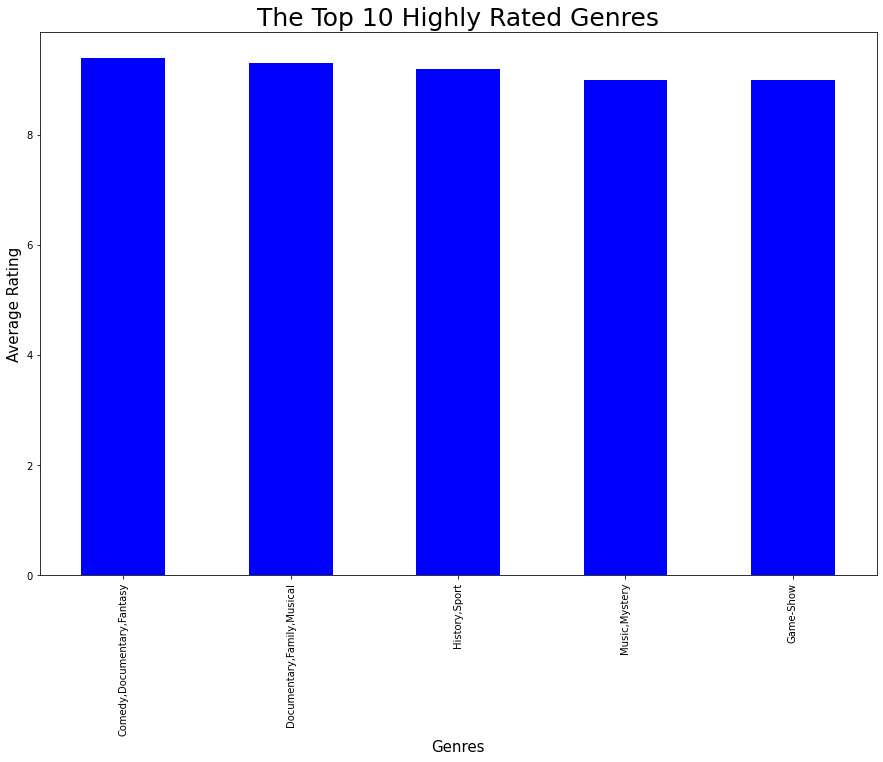

In [92]:
#Creating a graph of the top rated genres
ax = genre_ratings.plot( kind = 'bar', color = 'blue',figsize = (15,10))
ax.set_title ('The Top 10 Highly Rated Genres', fontsize = 25)
ax.set_ylabel('Average Rating',fontsize = 15)
ax.set_xlabel('Genres', fontsize = 15)
plt.show()

From the above analysis we have a picture of ho the movie production market trends. This can be used by the client to establish market position and answer several questions that may arise from the creation of a movie studio.